---
## Linear Regression - Lets fit a line!
---

Lets create some data with a linear relationship. 

For this example, lets use **`slope = 0.8`** and **`bias = 5`** _i.e. Y = 0.8 \* X + 5_

Lets also add some random noise sampled from a Gaussian with `mean = 0` and `std = 5`

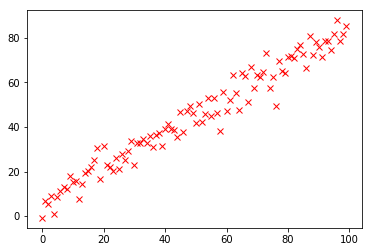

In [1]:
import time
from IPython import display

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

num_points = 100
X = np.arange(num_points)
Y = (X * 0.8 + 5) + np.random.normal(0, 5, num_points)
# Plot the points
plt.plot(X, Y, 'rx')
plt.show()

Now lets start to build our linear regression model. First lets set some hyperparameters. We'll need a learning rate for gradient descent and number of training_epochs over the dataset

In [2]:
# Hyperparameter
learning_rate = 0.0006
training_epochs = 1000

Next, lets create a tensorflow graph that defines a simple single variable linear regression model that uses squared loss and gradient descent optimization.

* **Step 1**: Lets create placeholders for the input variable `x` and the output variable `y`. Note that the shape has been explicitly mentioned. This is not necessary however.

In [3]:
# First create placeholders for the input and output
# These placeholders will be later supplied with the data we created at execution time
x = tf.placeholder(tf.float32, shape=(num_points,))
y = tf.placeholder(tf.float32, shape=(num_points,))

* **Step 2**: Now create tensorflow *Variables* for the Weight and Bias that have to be learned. *Variables* allow for its value to be changed at execution time. Since our parameters are to be "learned" and is updated after every epoch, we need to use *Variables* for the weight and bias term.

  Variables **MUST** be supplied with an initial value that can be a tensor or a python object convertible to a tensor. It can also optionally take in the data type and a name (commonly used) among other parameters.

In [4]:
# Create variables to hold the weight and bias
W = tf.Variable(0.1, dtype=tf.float32, name="weight")
b = tf.Variable(0.1, dtype=tf.float32, name="bias")

* **Step 3**: Lets create our linear model and define our loss function

In [5]:
# The linear model to compute Y
y_predicted = W * x + b

# Compute all the deltas between the computed y and the actual Y and square the errors
squared_deltas = tf.square(y_predicted - y)

# Aggregate all the deltas over all the examples and divide its by the number of examples
loss = tf.divide(tf.reduce_sum(squared_deltas), 2*num_points)

* **Step 4**: Once the loss is computed, we now have to run the optimizer. We can use Gradient Descent

In [6]:
# Create a gradient descent optimizer with the set learning rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# Run the optimizer to minimize loss
# Tensorflow automatically computes the gradients for the loss function!!!
train = optimizer.minimize(loss)

While constants are initialized, the Variables are not. To do this, we must explicitly call the `global_variables_initializer()` function.

In [7]:
# Initialize all variables
init = tf.global_variables_initializer()

* **Step 5**: Lets run the graph. First lets create a session and initialize the variables. After that, we will run gradient descent over the entire training set for the specified number of training_epochs. We will capture the variables of interest and print it out to monitor the optimization process.

  Note: Learning rates `0.0005`+ doesn't let the optimization converge. The weights/biases bounce between +/- values and increase infinity.
 
 
* **Step 6**: Plot the computed points as a line using the weight and bias terms, along with the original data points.

W: 0.8581 B: 0.9683 Loss: 14.5132


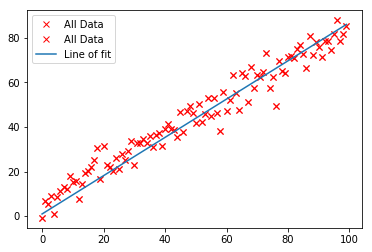

In [8]:
# Run the graph
with tf.Session() as sess:
    # Initialize all variables
    sess.run(init)
    
    # For each epoch
    for epoch in range(training_epochs):
        # Run the optimizer and get the loss 
        curr_W, curr_b, curr_loss, _  = sess.run([W, b, loss, train], feed_dict = {x: X, y: Y})

    print("W: %.4f"%curr_W, "B: %.4f"%curr_b, "Loss: %.4f"%curr_loss)

    # Plot the points
    plt.plot(X, Y, 'rx', label="All Data")
    plt.plot(X, Y, 'rx', label="All Data")
    # Plot the computed points as a line
    plt.plot(X, curr_W * X + curr_b, label="Line of fit")
    plt.legend()

    plt.show()
    
    # This must be used if the output/plot is being printed within the loop
#     display.clear_output(wait=True)
#     time.sleep(0.1)
    

And there you have it! The line fits! Playing with the hyperparameters can get better fits!